In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/f-1-racer-diet-planning/sample_submission.csv
/kaggle/input/f-1-racer-diet-planning/train.csv
/kaggle/input/f-1-racer-diet-planning/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/f-1-racer-diet-planning/train.csv")
test = pd.read_csv("/kaggle/input/f-1-racer-diet-planning/test.csv")

In [3]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

train.head(10)

Train shape: (750000, 9)
Test shape: (250000, 8)


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
5,5,female,26,156.0,56.0,19.0,100.0,40.5,103.0
6,6,female,21,172.0,73.0,3.0,81.0,38.3,9.0
7,7,male,46,188.0,94.0,23.0,100.0,40.8,145.0
8,8,female,33,166.0,63.0,25.0,107.0,40.5,161.0
9,9,male,65,185.0,88.0,23.0,104.0,41.0,185.0


In [4]:
train.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [5]:
train.describe()


,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


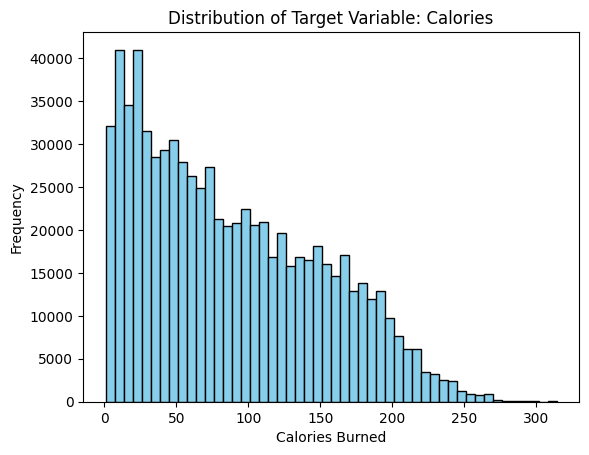

In [6]:
import matplotlib.pyplot as plt

plt.hist(train['Calories'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Calories Burned")
plt.ylabel("Frequency")
plt.title("Distribution of Target Variable: Calories")
plt.show()

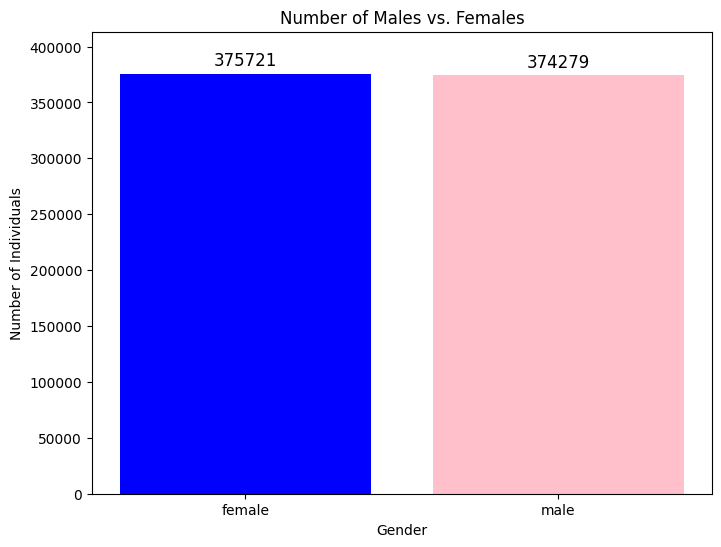

In [7]:
gender_counts =train['Sex'].value_counts()
genders = gender_counts.index
counts = gender_counts.values

# 2. Plot the data
plt.figure(figsize=(8, 6))
plt.bar(genders, counts, color=['blue', 'pink'])
plt.title('Number of Males vs. Females')
plt.xlabel('Gender')
plt.ylabel('Number of Individuals')

max_count = max(counts)
plt.ylim(0, max_count + max_count * 0.1) 

for i, v in enumerate(counts):
    plt.text(i, v + max_count * 0.02, str(v), ha='center', fontsize=12)

plt.show()


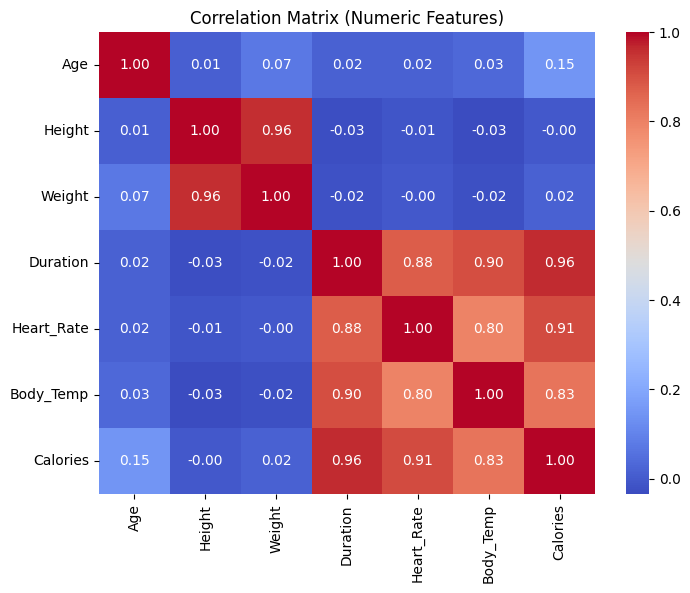

In [8]:
import seaborn as sns

numeric_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
corr = train[numeric_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


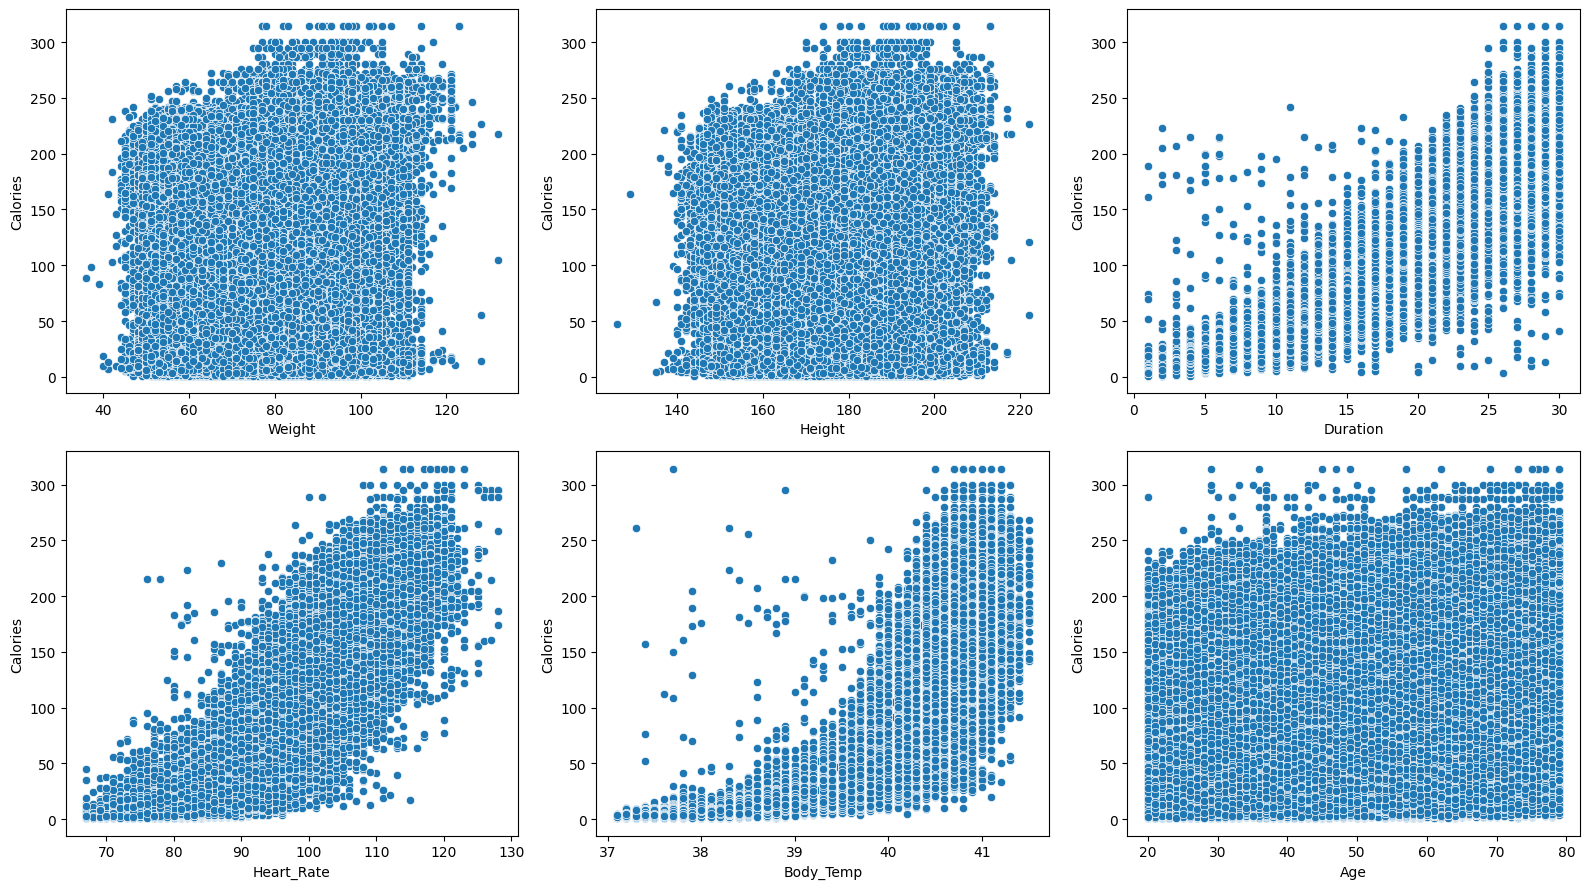

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(16, 9))

sns.scatterplot(x='Weight', y='Calories', data=train, ax=axes[0,0])
sns.scatterplot(x='Height', y='Calories', data=train, ax=axes[0,1])
sns.scatterplot(x='Duration', y='Calories', data=train, ax=axes[0,2])
sns.scatterplot(x='Heart_Rate', y='Calories', data=train, ax=axes[1,0])
sns.scatterplot(x='Body_Temp', y='Calories', data=train, ax=axes[1,1])
sns.scatterplot(x='Age', y='Calories', data=train, ax=axes[1,2])

plt.tight_layout()
plt.show()


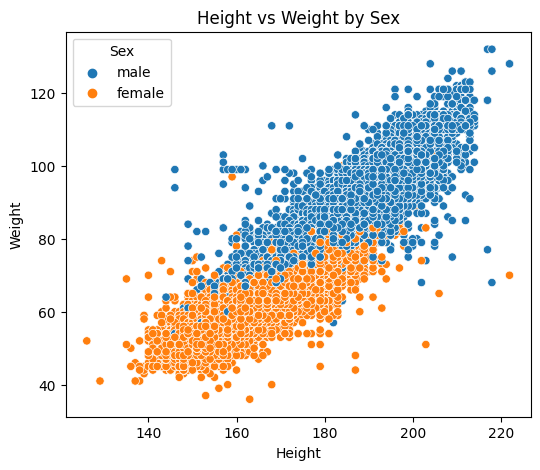

In [10]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=train, x='Height', y='Weight', hue='Sex')
plt.title("Height vs Weight by Sex")
plt.show()

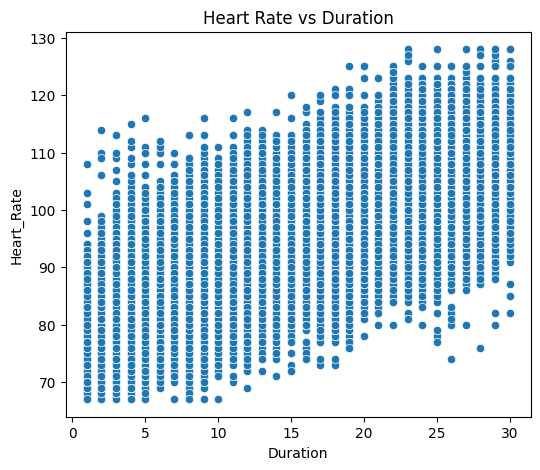

In [11]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=train, x='Duration', y='Heart_Rate')
plt.title("Heart Rate vs Duration")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


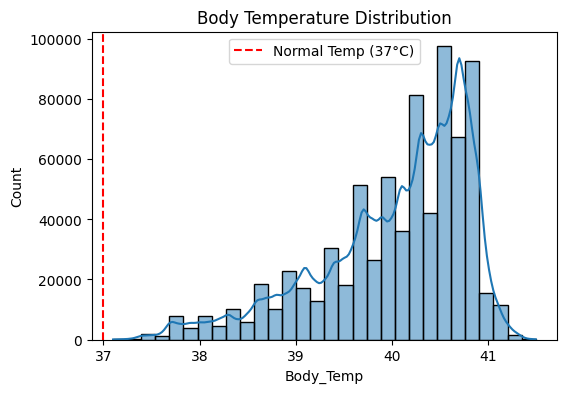

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(train['Body_Temp'], bins=30, kde=True)
plt.axvline(37, color='red', linestyle='--', label='Normal Temp (37°C)')
plt.title("Body Temperature Distribution")
plt.legend()
plt.show()

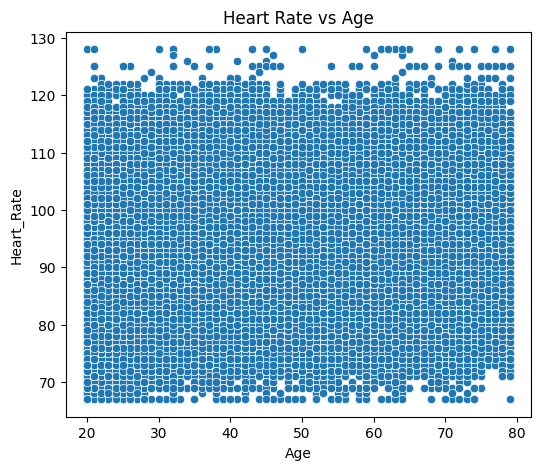

In [13]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=train, x='Age', y='Heart_Rate')
plt.title("Heart Rate vs Age")
plt.show()

In [14]:
for df in [train, test]:
    df['Sex'] = (df['Sex'] == 'male').astype(int)
    df['BMI'] = df['Weight'] / ((df['Height']/100) ** 2)
    df['Heart_Workload'] = df['Heart_Rate'] * df['Duration']
    df['Temp_Stress'] = (df['Body_Temp'] - 37) * df['Duration']
    df['HR_Ratio'] = df['Heart_Rate'] / (220 - df['Age'])
    df['Wt_per_Height'] = df['Weight'] / df['Height']

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


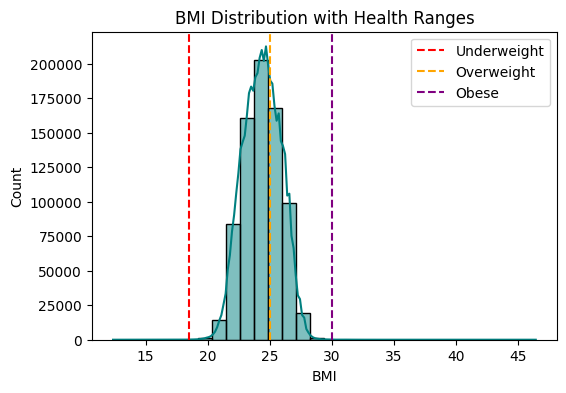

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(train['BMI'], bins=30, kde=True, color='teal')
plt.axvline(18.5, color='red', linestyle='--', label='Underweight')
plt.axvline(25, color='orange', linestyle='--', label='Overweight')
plt.axvline(30, color='purple', linestyle='--', label='Obese')
plt.title("BMI Distribution with Health Ranges")
plt.legend()
plt.show()

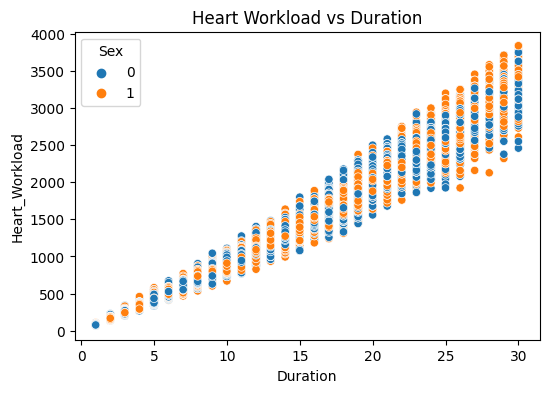

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=train, x='Duration', y='Heart_Workload', hue='Sex')
plt.title("Heart Workload vs Duration")
plt.show()

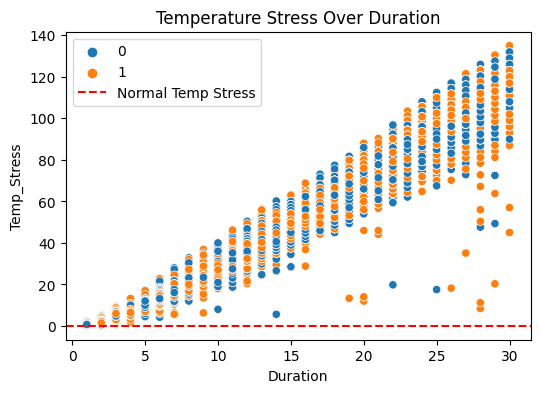

In [17]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=train, x='Duration', y='Temp_Stress', hue='Sex')
plt.axhline(0, color='red', linestyle='--', label='Normal Temp Stress')
plt.title("Temperature Stress Over Duration")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


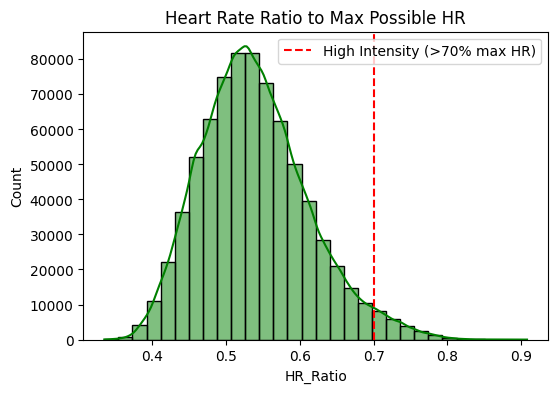

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(train['HR_Ratio'], bins=30, kde=True, color='green')
plt.axvline(0.7, color='red', linestyle='--', label='High Intensity (>70% max HR)')
plt.title("Heart Rate Ratio to Max Possible HR")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


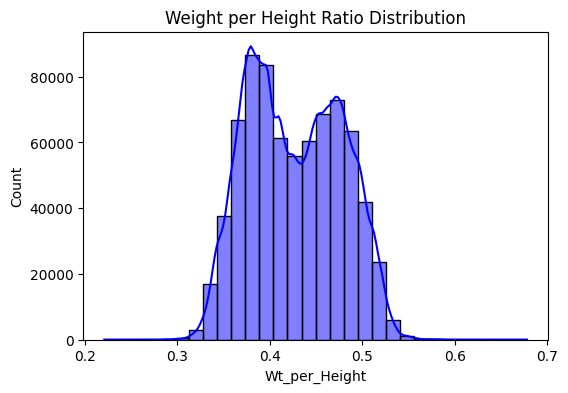

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(train['Wt_per_Height'], bins=30, kde=True, color='blue')
plt.title("Weight per Height Ratio Distribution")
plt.show()

In [20]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from catboost import CatBoostRegressor
import xgboost as xgb

X = train.drop(['id', 'Calories'], axis=1)
y = train['Calories']
X_test = test.drop(['id'], axis=1)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


lgb_model = lgb.LGBMRegressor(
    n_estimators=2000, learning_rate=0.05,
    num_leaves=64, subsample=0.8, colsample_bytree=0.8,
    random_state=42
)
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(100)]
)


cat_model = CatBoostRegressor(
    iterations=2000, learning_rate=0.05, depth=8,
    l2_leaf_reg=3, subsample=0.8, random_seed=42,
    verbose=200, early_stopping_rounds=50
)
cat_model.fit(X_train, y_train, eval_set=(X_val, y_val))


xgb_model = xgb.XGBRegressor(
    n_estimators=2000, learning_rate=0.05, max_depth=8,
    subsample=0.8, colsample_bytree=0.8, random_state=42
)
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    early_stopping_rounds=50,
    verbose=100
)


val_preds_lgb = lgb_model.predict(X_val)
val_preds_cat = cat_model.predict(X_val)
val_preds_xgb = xgb_model.predict(X_val)

val_preds_avg = (val_preds_lgb + val_preds_cat + val_preds_xgb) / 3
rmse = np.sqrt(mean_squared_error(y_val, val_preds_avg))
print(f"Validation RMSE (Ensemble): {rmse:.4f}")


preds_test = (
    lgb_model.predict(X_test) +
    cat_model.predict(X_test) +
    xgb_model.predict(X_test)
) / 3


submission = pd.DataFrame({
    'id': test['id'],
    'Calories': preds_test
})
submission.to_csv("/kaggle/working/submission.csv", index=False)
print("✅ Submission saved to /kaggle/working/submission.csv")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037697 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1619
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 12
[LightGBM] [Info] Start training from score 88.298465
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 3.70499	valid_0's l2: 13.727
[200]	valid_0's rmse: 3.5984	valid_0's l2: 12.9485
[300]	valid_0's rmse: 3.58772	valid_0's l2: 12.8717
[400]	valid_0's rmse: 3.58111	valid_0's l2: 12.8244
[500]	valid_0's rmse: 3.58025	valid_0's l2: 12.8182
Early stopping, best iteration is:
[471]	valid_0's rmse: 3.5795	valid_0's l2: 12.8128
0:	learn: 59.4473817	test: 59.2792207	best: 59.2792207 (0)	total: 136ms	remaining: 4m 31s
200:	learn: 3.6350865	test: 3.7041791	best: 3.7041791 (200)	total: 12.3s	remaining: 1m 49s
400:	learn: 3.5021750	test: 3.6274910	best: 3.6274910 (400)	total: 23.

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:3.63357
[200]	validation_0-rmse:3.57991
[300]	validation_0-rmse:3.57817
[400]	validation_0-rmse:3.57716
[436]	validation_0-rmse:3.57703
Validation RMSE (Ensemble): 3.5435
✅ Submission saved to /kaggle/working/submission.csv
